# Viewing UM healpix output on JASMIN object store

In [10]:
import xarray as xr
import easygems.healpix as egh

In [13]:
from um_to_healpix.um_processing_config import output_vn, deploy
print(f'Currently using {output_vn=}, {deploy=}')

Currently using output_vn='v5.3', deploy='dev'


In [17]:
sim = 'glm.n2560_RAL3p3'
freq = 'PT1H'
zoom = 10
if on_jasmin:
    protocol = 'http'
    baseurl = 'hackathon-o.s3.jc.rl.ac.uk'
else:
    protocol = 'https'
    baseurl = 'hackathon-o.s3-ext.jc.rl.ac.uk'
url = f'{protocol}://{baseurl}/sim-data/{deploy}/{output_vn}/{sim}/um.{freq}.hp_z{zoom}.zarr'
print(url)

ds = xr.open_dataset(url, engine='zarr')

http://hackathon-o.s3.jc.rl.ac.uk/sim-data/dev/v5.3/glm.n2560_RAL3p3/um.PT1H.hp_z10.zarr


In [15]:
ds

<xarray.Dataset> Size: 13TB
Dimensions:  (time: 9745, cell: 12582912)
Coordinates:
  * time     (time) datetime64[ns] 78kB 2020-01-20 ... 2021-03-01
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    crs      float64 8B ...
Data variables: (12/28)
    clivi    (time, cell) float32 490GB ...
    clt      (time, cell) float32 490GB ...
    clwvi    (time, cell) float32 490GB ...
    hflsd    (time, cell) float32 490GB ...
    hfssd    (time, cell) float32 490GB ...
    huss     (time, cell) float32 490GB ...
    ...       ...
    rsutcs   (time, cell) float32 490GB ...
    sftlf    (cell) float64 101MB ...
    tas      (time, cell) float32 490GB ...
    ts       (time, cell) float32 490GB ...
    uas      (time, cell) float32 490GB ...
    vas      (time, cell) float32 490GB ...
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

<Figure size 640x480 with 0 Axes>

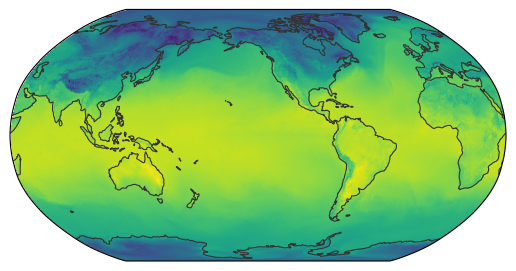

In [16]:
egh.healpix_show(ds.tas.isel(time=0))